<a href="https://colab.research.google.com/github/dtothej247/stockoptimizer/blob/main/Stock_Portfolio_Optimizer_Using_Pythog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Description: This program attempts to optimize a users portfolio using the Efficient Frontier
# Credit to: https://youtu.be/9fjs8FeLMJk

In [8]:
#import python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
#Get stock tickers in the portfolio
assets = ['AAPL','MSFT','TSLA','GOOG']

In [10]:
# Assign weights to tickers
weights = np.array([0.25,0.25,0.25,0.25])

In [11]:
#Get stock starting date
stockStartDate = '2013-01-01'

In [12]:
# End date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-04-21'

In [13]:
#Create Data Frame to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [14]:
# Show data frame (df)
df

,AAPL,MSFT,TSLA,GOOG
Date,,,,
2013-01-02,17.039789,23.127514,7.072000,360.274597
2013-01-03,16.824715,22.817688,6.954000,360.483826
2013-01-04,16.356062,22.390646,6.880000,367.607117
2013-01-07,16.259851,22.348782,6.868000,366.003143
2013-01-08,16.303608,22.231552,6.736000,365.280823
...,...,...,...,...
2021-04-15,134.500000,259.500000,738.849976,2296.659912
2021-04-16,134.160004,260.739990,739.780029,2297.760010
2021-04-19,134.839996,258.739990,714.630005,2302.399902


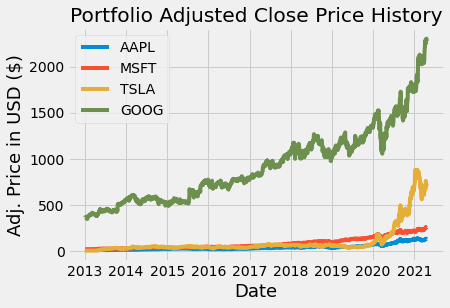

In [15]:
#Visually show the stock / protfolio
title = 'Portfolio Adjusted Close Price History'

#Get stocks
my_stocks = df

#Create and plot graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price in USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [16]:
# Show daily simple returns
returns = df.pct_change()
returns

,AAPL,MSFT,TSLA,GOOG
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,-0.013396,-0.016686,0.000581
2013-01-04,-0.027855,-0.018715,-0.010641,0.019760
2013-01-07,-0.005882,-0.001870,-0.001744,-0.004363
2013-01-08,0.002691,-0.005245,-0.019220,-0.001974
...,...,...,...,...
2021-04-15,0.018708,0.015298,0.009041,0.018547
2021-04-16,-0.002528,0.004778,0.001259,0.000479
2021-04-19,0.005069,-0.007670,-0.033997,0.002019


In [18]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252 # shows how two random variables vary or move together
cov_matrix_annual

,AAPL,MSFT,TSLA,GOOG
AAPL,0.082383,0.044491,0.052726,0.038909
MSFT,0.044491,0.069750,0.051474,0.045126
TSLA,0.052726,0.051474,0.321333,0.047910
GOOG,0.038909,0.045126,0.047910,0.066850


In [19]:
#Calculate portfolio variance
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.06884915861456953

In [20]:
# Calculate portfolio volatility
port_volatility = np.sqrt(port_variance)
port_volatility

0.26239123196968595

In [21]:
# Calculate annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.39756329095798626

In [23]:
# Show expected annual return, volatility, and variance

percent_var = str( round(port_variance,4) * 100) + '%'
percent_vols = str(round(port_volatility, 4) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn,4) * 100) + '%'

print('Expected Annual Return: ' + percent_ret)
print('Annual Volatility: ' + percent_vols)
print('Annual Variance: ' + percent_var)

Expected Annual Return: 39.76%
Annual Volatility: 26.240000000000002%
Annual Variance: 6.88%


In [24]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 1.3MB 20.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.12-cp37-cp37m-linux_x86_64.whl size=2731688 sha256=1fb5838c2eecfe603f8696b10f56663a4120fafcb4738699e4216f447322580e
  Stored in directory: /root/.cache/pip/wheels/9b/62/55/1da181c05c710c5d99bd560edebec3bd6a61cb69acef9dc00e
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [25]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [27]:
# Portfolio Optimization

#Calculate expected returns and the annualized sample covariance of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio - measures performance of an investment ?
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('AAPL', 0.08641), ('MSFT', 0.58344), ('TSLA', 0.33015), ('GOOG', 0.0)])
Expected annual return: 46.9%
Annual volatility: 29.4%
Sharpe Ratio: 1.52


(0.4690321245773702, 0.2944629094765761, 1.5249191328563223)

In [30]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation:', allocation)
print('Funds remaining: ${:0.2f}'.format(leftover))

Discrete Allocation: {'AAPL': 7, 'MSFT': 23, 'TSLA': 4}
Funds remaining: $193.21
